In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data1=pd.read_csv("C:/Users/student/Downloads/NHANES.csv")

In [13]:
data1

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


In [4]:
data = data1.loc[:,('SEQN','SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI')]
data.head()

,SEQN,SMQ020,RIAGENDR,RIDAGEYR,DMDEDUC2,BMXWT,BMXHT,BMXBMI
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   SMQ020    5735 non-null   int64  
 2   RIAGENDR  5735 non-null   int64  
 3   RIDAGEYR  5735 non-null   int64  
 4   DMDEDUC2  5474 non-null   float64
 5   BMXWT     5666 non-null   float64
 6   BMXHT     5673 non-null   float64
 7   BMXBMI    5662 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 358.6 KB


In [6]:
data.columns = ['seqn','smoking','gender', 'age','education','weight','height','bmi']

In [7]:
data.drop(columns = 'seqn', inplace = True)

In [12]:
data1.shape

(5735, 28)

In [8]:
data.isnull().sum()

smoking        0
gender         0
age            0
education    261
weight        69
height        62
bmi           73
dtype: int64

In [9]:
data.dropna(inplace = True)

In [10]:
data.shape

(5406, 7)

In [14]:
numerical = ['age','weight','height','bmi']
data[numerical].describe()

,age,weight,height,bmi
count,5406.000000,5406.000000,5406.000000,5406.000000
mean,49.390122,81.715594,166.055679,29.541861
std,17.640915,21.775173,10.107149,7.076574
min,20.000000,32.400000,129.700000,14.500000
25%,34.000000,66.300000,158.600000,24.500000
50%,49.000000,78.500000,165.900000,28.500000
75%,64.000000,93.200000,173.400000,33.200000
max,80.000000,198.900000,202.700000,67.300000


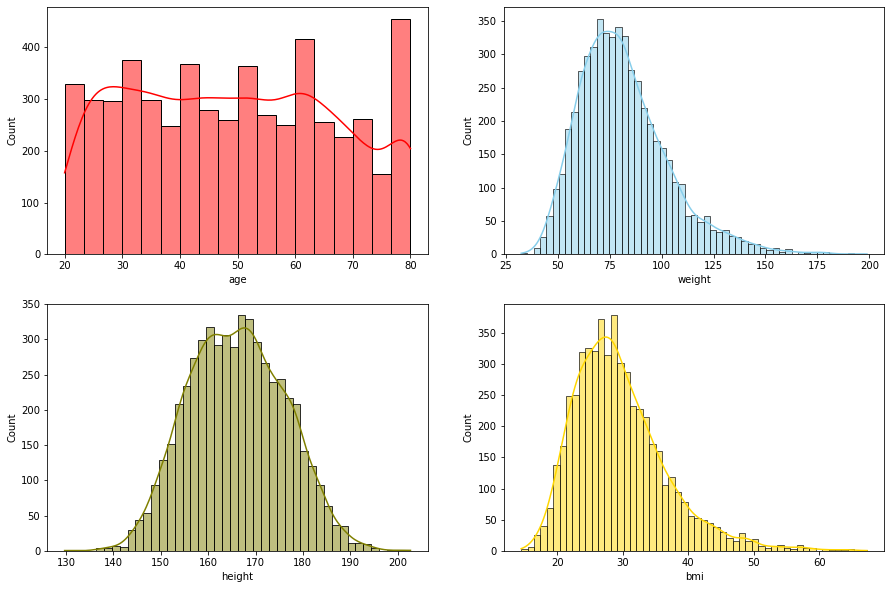

In [15]:
fig, axs = plt.subplots(2,2, figsize=(15, 10))
      
sns.histplot(data= data, x="age", kde=True, color="red", ax=axs[0,0])
sns.histplot(data= data, x="weight", kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= data, x="height", kde=True, color="olive", ax=axs[1,0])
sns.histplot(data= data, x="bmi", kde=True, color="gold", ax=axs[1,1])

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

<AxesSubplot:xlabel='bmi'>

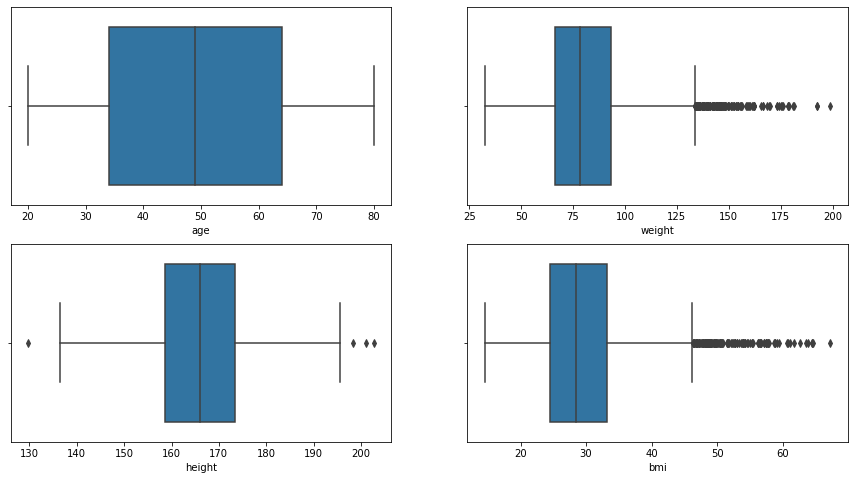

In [16]:
fig, axs = plt.subplots(2,2, figsize=(15,8))
sns.boxplot(data['age'], ax = axs[0,0])
sns.boxplot(data['weight'], ax = axs[0,1])
sns.boxplot(data['height'], ax = axs[1,0])
sns.boxplot(data['bmi'], ax = axs[1,1])

In [17]:
qh25, qh50, qh75 = np.percentile(data['height'], [25,50,75])
iqrh = qh75-qh25
minh = qh25 - 1.5*iqrh
maxh = qh75 + 1.5*iqrh

#Choose the data inside IQR
data = data[(data['height'] > minh) & (data['height'] < maxh)]

In [18]:
qw25, qw50, qw75 = np.percentile(data['weight'], [25,50,75])
iqrw = qw75-qw25
maxw = qh75 + 1.5*iqrw

#Choose the data inside IQR (only data below the max value of weight since the data is right-skewed)
data = data[data['weight'] < maxw]

In [19]:
qb25, qb50, qb75 = np.percentile(data['bmi'], [25,50,75])
iqrb = qb75-qb25
maxb = qb75 + 1.5*iqrb

#Choose the data inside IQR (only data below the max value of bmi since the data is right-skewed)
data = data[data['bmi'] < maxb]

In [20]:
data.shape

(5252, 7)

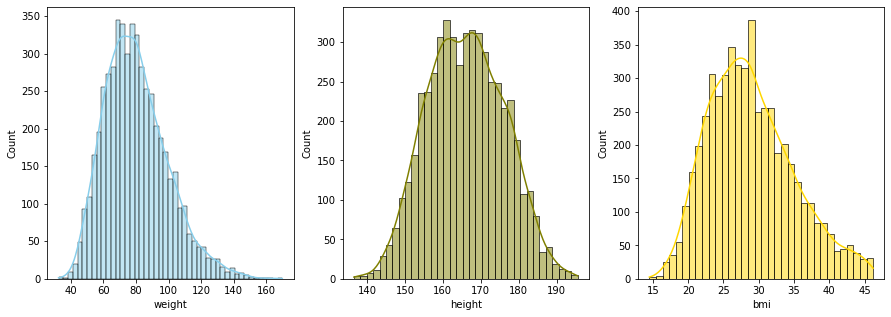

In [21]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))
      
sns.histplot(data= data, x="weight", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data= data, x="height", kde=True, color="olive", ax=axs[1])
sns.histplot(data= data, x="bmi", kde=True, color="gold", ax=axs[2])

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


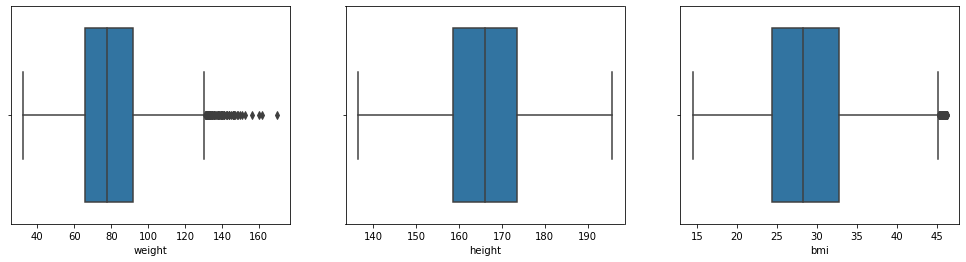

In [22]:
fig, axs = plt.subplots(1,3, figsize=(17, 4))

sns.boxplot(data['weight'], ax = axs[0])
sns.boxplot(data['height'], ax = axs[1])
sns.boxplot(data['bmi'], ax = axs[2])

plt.show()

In [23]:
data['smoking'] = data['smoking'].replace({1 : 'yes', 2 : 'no', 7 : np.nan, 9 : np.nan})

#gender
data['gender'] = data.gender.replace({1 : 'male', 2 : 'female'})

#education
data['education'] = data.education.replace({1 : '<9th grade', 2 : '9-11th grade',
                                           3 : 'HS or GED', 4 : 'Some college / AA',
                                           5 : 'College or above', 7 : 'Other',
                                           8 : 'Other'})

In [24]:
categorical = data[['smoking','gender','education']]
categorical.head() 

,smoking,gender,education
0,yes,male,College or above
1,yes,male,HS or GED
2,yes,male,HS or GED
3,no,female,College or above
4,no,female,Some college / AA


In [25]:
dummy = pd.get_dummies(categorical,drop_first=True)
dummy

,smoking_yes,gender_male,education_9-11th grade,education_<9th grade,education_College or above,education_HS or GED,education_Some college / AA
0,1,1,0,0,1,0,0
1,1,1,0,0,0,1,0
2,1,1,0,0,0,1,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
5730,1,0,0,0,0,1,0
5731,0,1,0,0,1,0,0
5732,1,0,0,0,0,0,1
5733,1,1,0,1,0,0,0


In [26]:
numerical = data[['age', 'weight','height','bmi']]
skew_limit = 0.75 
skew_vals = numerical.skew()
skew_vals

age       0.107088
weight    0.653454
height    0.077404
bmi       0.520106
dtype: float64

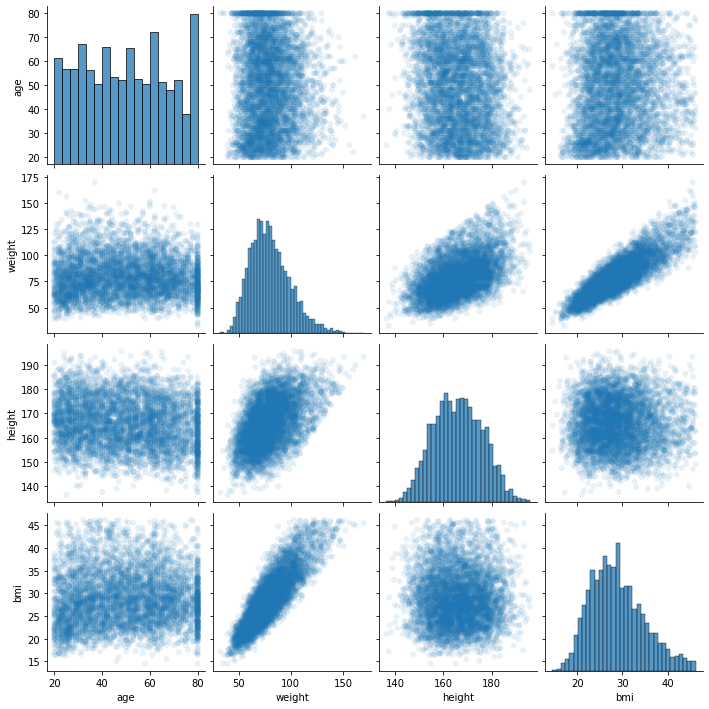

In [27]:
sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))

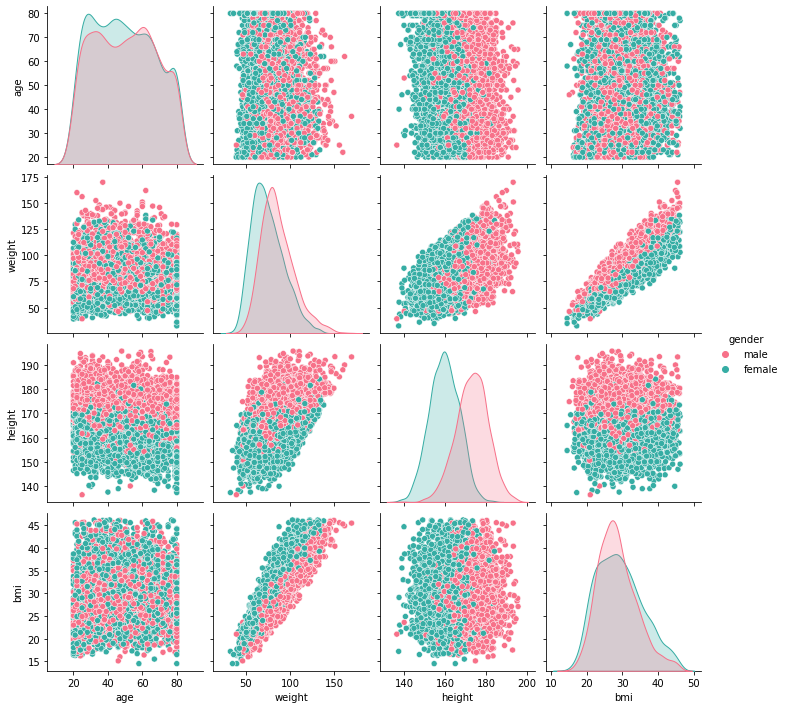

In [28]:
sns.pairplot(data, hue = 'gender', palette = 'husl')

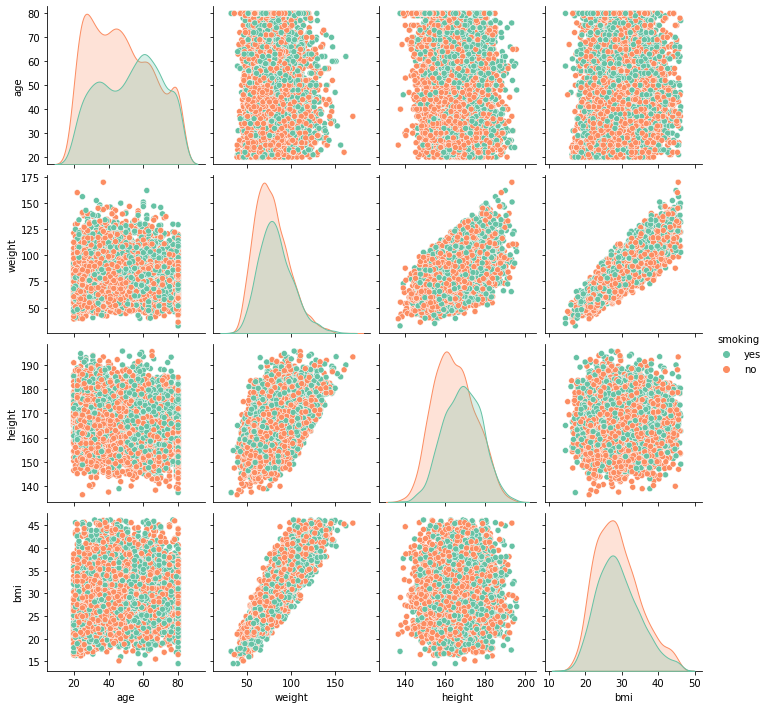

In [29]:
sns.pairplot(data, hue = 'smoking', palette = 'Set2')

In [30]:
data['age'] = pd.cut(data.age, [18,30,40,50,60,70,80])

In [31]:
data_cat = data.groupby(['age','gender']).agg({'smoking': [lambda x : np.mean(x == 'yes'), np.size]})
data_cat.columns = ['proportion','size']
data_cat

proportion  size
age      gender                  
(18, 30] female    0.234522   533
         male      0.375824   455
(30, 40] female    0.282222   450
         male      0.503401   441
(40, 50] female    0.262605   476
         male      0.447028   387
(50, 60] female    0.424036   441
         male      0.568849   443
(60, 70] female    0.382423   421
         male      0.651551   419
(70, 80] female    0.327456   397
         male      0.652956   389

In [32]:
data_num = data[['gender','age','weight','height','bmi']]
data_num.groupby(['age','gender']).agg(['mean','std'])

weight                 height                  bmi  \
                      mean        std        mean       std       mean   
age      gender                                                          
(18, 30] female  71.971295  18.605828  161.450094  6.867726  27.558161   
         male    83.320879  19.261460  174.909890  7.701208  27.183297   
(30, 40] female  76.091111  19.726570  160.744444  7.207113  29.344889   
         male    88.335147  19.706370  174.084354  7.755265  29.067347   
(40, 50] female  77.595168  18.692238  160.225630  7.163041  30.174370   
         male    88.724548  19.747783  173.806202  7.563134  29.247028   
(50, 60] female  75.917007  16.789526  159.985261  6.917037  29.602041   
         male    86.674266  18.809328  172.935892  8.383587  28.866591   
(60, 70] female  75.776485  17.716172  158.029929  6.982854  30.254157   
         male    86.022196  18.078713  171.831742  7.290485  29.017422   
(70, 80] female  70.566247  15.371260  156.253401  6.688228  28.836272   
         male    81.334704  16.850614  170.379177  7.485395  27.899743   

                           
                      std  
age      gender            
(18, 30] female  6.624561  
         male    5.771789  
(30, 40] female  6.871599  
         male    5.684898  
(40, 50] female  6.717175  
         male    5.654652  
(50, 60] female  5.933152  
         male    5.282098  
(60, 70] female  6.356145  
         male    5.208027  
(70, 80] female  5.698754  
         male    4.847672

In [33]:
pd.crosstab(data.gender, data.age)

age,"(18, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
gender,,,,,,
female,533,450,476,441,421,397
male,455,441,387,443,419,389


In [35]:
mean_bmi = 30.174370
std_bmi = 6.717175
n_bmi = 476

In [36]:
sem = mean_bmi/np.sqrt(n_bmi)

t_value = (mean_bmi - 30) / sem 

print('sem:', sem, 't_value:', t_value)

sem: 1.3830399813886576 t_value: 0.12607733857767542
